In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

df=pd.read_csv('covid_forecast_dashboard.csv')
df.head(5)


,state,date,month,day,ty_visits,ly_visits,hosp_admissions,Unemployed %,stay_home,predictions
0,NY,2/1/2020,2,1,1281.0,1152,0,1.74,0,1176
1,NY,2/2/2020,2,2,301.0,383,0,1.75,0,472
2,NY,2/3/2020,2,3,1131.0,1065,0,1.75,0,1096
3,NY,2/4/2020,2,4,1178.0,1127,0,1.75,0,1153
4,NY,2/5/2020,2,5,1184.0,1114,0,1.75,0,1141


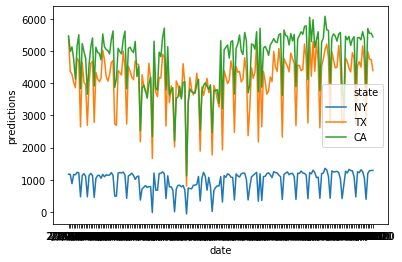

In [11]:
ax=sns.lineplot(x='date' ,y='predictions', hue='state', data=df)

In [2]:
ny=df[df['state']=='NY']
tx=df[df['state']=='TX']
ca=df[df['state']=='CA']

In [29]:
# Initialize figure
fig = go.Figure(  )

# Add Traces

fig.add_trace(
    go.Scatter(x=list(ny.date),
               y=list(ny.predictions),
               name="NY Banfield Visits - Forecast",
               line=dict(color="#7f7f7f")))

fig.add_trace(
    go.Scatter(x=list(ny.date),
               y=list(ny.ty_visits),
               name="NY Banfield Visits - Actual",
              # visible=False,
               line=dict(color="#1f77b4", dash="dash")))


fig.add_trace(
    go.Scatter(x=list(tx.date),
               y=list(tx.predictions),
               name="TX Banfield Visits - Forecast",
               line=dict(color="#7f7f7f")))

fig.add_trace(
    go.Scatter(x=list(tx.date),
               y=list(tx.ty_visits),
               name="TX Banfield Visits - Actual",
              # visible=False,
               line=dict(color="#1f77b4", dash="dash")))


fig.add_trace(
    go.Scatter(x=list(ca.date),
               y=list(ca.predictions),
               name="CA Banfield Visits - Forecast",
               line=dict(color="#7f7f7f")))

fig.add_trace(
    go.Scatter(x=list(ca.date),
               y=list(ca.ty_visits),
               name="CA Banfield Visits - Actual",
               #visible=False,
               line=dict(color="#1f77b4", dash="dash")))




# Add Annotations and Buttons
ny_annotations = [dict(x="2020-01-01",
                         y=ny.ty_visits,
                         xref="x", yref="y",
#                          text="NY Actual Visits:<br> %.3f" % ny.ty_visits,
#                          ax=0, ay=-40
                      ),
                    dict(x=ny.date,
                         y=ny.predictions,
                         xref="x", yref="y",
                   #      text="NY Forecast:<br> %.3f" % ny.date.max(),
                   #      ax=0, ay=-40
                        )]

tx_annotations = [dict(x="2020-01-01",
                         y=tx.ty_visits,
                         xref="x", yref="y",
                   #      text="TX Actual Visits:<br> %.3f" % tx.ty_visits,
                   #      ax=0, ay=-40
                      ),
                    dict(x=tx.date,
                         y=tx.predictions,
                         xref="x", yref="y",
#                          text="TX Forecast:<br> %.3f" % tx.date.max(),
#                          ax=0, ay=-40
                        )]
                       
                       
ca_annotations = [dict(x="2020-01-01",
                         y=ca.ty_visits,
                         xref="x", yref="y",
                  #       text="CA Actual Visits:<br> %.3f" % ca.ty_visits,
                 #        ax=0, ay=-40
                      ),
                    dict(x=ca.date,
                         y=ca.predictions,
                         xref="x", yref="y",
#                          text="CA Forecast:<br> %.3f" % ca.date.max(),
#                          ax=0, ay=-40
                        )]




fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="CA",
                     method="update",
                     args=[{"visible": [False,False,False,False, True,  True ]},
                           {"title": "CA Actual Visits vs. Forecast",
                            "annotations": ca_annotations}]),
                dict(label="NY",
                     method="update",
                     args=[{"visible": [True, True, False, False, False, False]},
                           {"title": "NY Actual Visits vs. Forecast",
                            "annotations": ny_annotations}]),
                dict(label="TX",
                     method="update",
                     args=[{"visible": [False, False, True, True, False, False]},
                           {"title": "TX Actual Visits vs. Forecast",
                            "annotations": tx_annotations}]),
               
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Actual vs. Forecasted Visits")
fig.update_layout(
    autosize=False,
    width=1500,
    height=750,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
    )
fig.show()


In [32]:
import plotly.io as pio
pio.write_html(fig, file='forecast2.html', auto_open=True)